In [4]:
# set up libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('countries.csv')
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
data_2007 = data[data.year == 2007]
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


<function matplotlib.pyplot.show(*args, **kw)>

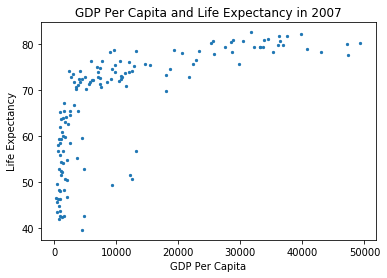

In [8]:
plt.scatter(data_2007.gdpPerCapita, data_2007.lifeExpectancy, 5)
plt.title('GDP Per Capita and Life Expectancy in 2007')
plt.ylabel('Life Expectancy')
plt.xlabel('GDP Per Capita')
plt.show

In [9]:
data_2007.gdpPerCapita.corr(data_2007.lifeExpectancy)

0.6786623986777587

<function matplotlib.pyplot.show(*args, **kw)>

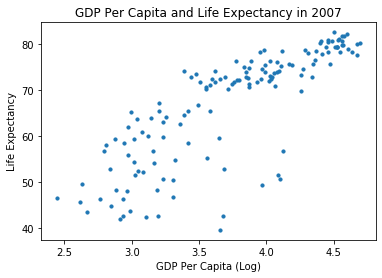

In [12]:
# log scale comparison

plt.scatter(np.log10(data_2007.gdpPerCapita), data_2007.lifeExpectancy, 5)
plt.title('GDP Per Capita and Life Expectancy in 2007')
plt.ylabel('Life Expectancy')
plt.xlabel('GDP Per Capita (Log)')
plt.show

In [14]:
np.log10(data_2007.gdpPerCapita).corr(data_2007.lifeExpectancy)

0.8089802514849209

In [17]:
## run same analysis for all years in dataset
years_sorted = sorted(set(data.year))

In [22]:
for given_year in years_sorted:
    data_year = data[data.year == given_year]
    plt.scatter(data_year.gdpPerCapita, data_year.lifeExpectancy, 5)
    plt.title(given_year)
    plt.xlim(0, 60000)
    plt.ylim(25, 85)
    plt.xlabel('GDP Per Capita')
    plt.ylabel('Life Expectancy')

#    plt.show()

    plt.savefig(str(given_year),dpi=200)
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [25]:
data[data.gdpPerCapita > 60000]

,country,continent,year,lifeExpectancy,population,gdpPerCapita
852,Kuwait,Asia,1952,55.565,160000,108382.35290
853,Kuwait,Asia,1957,58.033,212846,113523.13290
854,Kuwait,Asia,1962,60.470,358266,95458.11176
855,Kuwait,Asia,1967,64.624,575003,80894.88326
856,Kuwait,Asia,1972,67.712,841934,109347.86700


In [26]:
# log values

for given_year in years_sorted:
    data_year = data[data.year == given_year]
    plt.scatter(np.log10(data_year.gdpPerCapita), data_year.lifeExpectancy, 5)
    plt.title(given_year)
    plt.xlim(2, 5)
    plt.ylim(25, 85)
    plt.xlabel('GDP Per Capita')
    plt.ylabel('Life Expectancy')

#    plt.show()

    plt.savefig('log_'+str(given_year),dpi=200)
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [29]:
#Find correlation of log GDP and life expectancy by year

gdp_corr=[]
for given_year in years_sorted:
    data_year = data[data.year==given_year]
    x=np.log10(data_year.gdpPerCapita).corr(data_year.lifeExpectancy)
    gdp_corr.append(x)
gdp_corr # the list with the new items.

[0.7477807347946165,
 0.758795706016415,
 0.7705225443103859,
 0.7729986641186484,
 0.789405727501936,
 0.8135258808158442,
 0.846073426279085,
 0.8743940682796121,
 0.8558149463091763,
 0.8640205504436029,
 0.8251326766424232,
 0.8089802514849209]

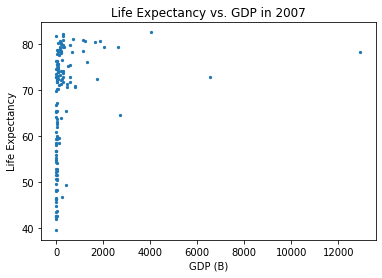

In [38]:
# Practice Problem: examine relationship between GDP (not per capita!) and life expectancy in 2007

data['gdp'] = data.gdpPerCapita * data.population
data_2007 = data[data.year == 2007]
#data_2007.head()

plt.scatter(data_2007.gdp/10**9, data_2007.lifeExpectancy,5)
plt.title('Life Expectancy vs. GDP in 2007')
plt.xlabel('GDP (B)')
plt.ylabel('Life Expectancy')
plt.show()

In [41]:
data_2007.gdp.corr(data_2007.lifeExpectancy)

0.22940871508473856

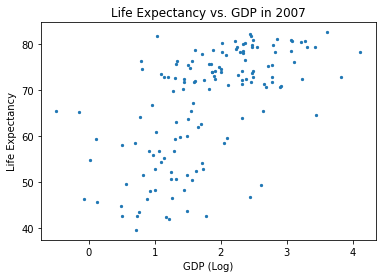

In [49]:
# Practice Problem: examine relationship between GDP (not per capita!) and life expectancy in 2007 - Log version

data['gdp'] = data.gdpPerCapita * data.population
data_2007 = data[data.year == 2007]
#data_2007.head()

plt.scatter(np.log10(data_2007.gdp/10**9), data_2007.lifeExpectancy,5)
plt.title('Life Expectancy vs. GDP in 2007')
plt.xlabel('GDP (Log)')
plt.ylabel('Life Expectancy')
plt.show()

In [42]:
np.log10(data_2007.gdp).corr(data_2007.lifeExpectancy)

0.6000405376447577

In [45]:
print('Correlation between log of GDP and Life Expectancy')
print(np.log10(data_2007.gdp).corr(data_2007.lifeExpectancy))
print('Correlation between log of GDP per Capita and Life Expectancy')
print(np.log10(data_2007.gdpPerCapita).corr(data_2007.lifeExpectancy))

Correlation between log of GDP and Life Expectancy
0.6000405376447577
Correlation between log of GDP per Capita and Life Expectancy
0.8089802514849209


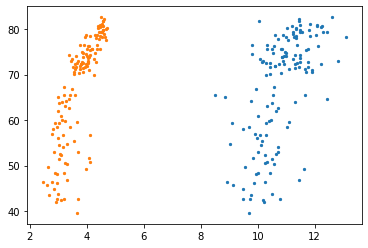

In [50]:
# you can plot two series on the same graph

plt.scatter(np.log10(data_2007.gdp), data_2007.lifeExpectancy, 5)
plt.scatter(np.log10(data_2007.gdpPerCapita), data_2007.lifeExpectancy, 5)